In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=pd.read_csv('takehome_users.csv',parse_dates=['creation_time'])
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_engagement=pd.read_csv('takehome_user_engagement.csv',parse_dates=['time_stamp'])
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:00,1,1
1,2013-11-15 03:45:00,2,1
2,2013-11-29 03:45:00,2,1
3,2013-09-12 03:45:00,2,1
4,2013-12-25 03:45:00,2,1


In [4]:
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'] ,unit='s')

In [5]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


From the above 2 given csv files, we need to identify adopted user from the user_engagement and merge it with
user by creating column name adopted_user.We need to build an model by making adopted_user column as target column and remaining as an independant columns and prediction can be done.

In [8]:
user_engagement['week']=user_engagement['time_stamp'].dt.week
user_engagement['year']=user_engagement['time_stamp'].dt.year

<ipython-input-8-86f77eb295b4>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  user_engagement['week']=user_engagement['time_stamp'].dt.week


A user is defined as an adopted user if he visits atleast 3 times in a week. So week_year column created from time_stamp

In [9]:
def add(col):
    a=col[0]
    b=col[1]
    return str(a)+str(b)

In [10]:
user_engagement['week_year']=user_engagement[['week','year']].apply(add,axis=1)

In [11]:
user_engagement

,time_stamp,user_id,visited,week,year,week_year
0,2014-04-22 03:53:00,1,1,17,2014,172014
1,2013-11-15 03:45:00,2,1,46,2013,462013
2,2013-11-29 03:45:00,2,1,48,2013,482013
3,2013-09-12 03:45:00,2,1,37,2013,372013
4,2013-12-25 03:45:00,2,1,52,2013,522013
...,...,...,...,...,...,...
207912,2013-06-09 06:14:00,11996,1,23,2013,232013
207913,2013-01-15 18:28:00,11997,1,3,2013,32013
207914,2014-04-27 12:45:00,11998,1,17,2014,172014
207915,2012-02-06 11:55:00,11999,1,6,2012,62012


In [12]:
d=user_engagement.groupby('user_id')['week_year'].value_counts()

In [13]:
adopted_user=[]
for i in user_engagement['user_id'].unique():
    if d[i].max()>2:
        adopted_user.append(i)
print('The number of adopted users are ',len(adopted_user))

The number of adopted users are  1350


Now, we have to create a column adopted_user in user dataframe. 

In [14]:
def adopted(v):
    if v in adopted_user:
        return 1
    else:
        return 0

In [15]:
user['adopted_user']=user['object_id'].apply(adopted)

In [16]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [18]:
user.fillna(0,inplace=True)#filling missing values with 0
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)


we can ignore object_id,name,email as these are unique and personal.
We can ignore last_session_creation_time as it is used for identifying adopted_user or not.
We can drop creation_time and add days_since_creation column

In [19]:
data=user.drop(['object_id','name','email'],axis=1)
data

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:00,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2013-11-15 03:45:00,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,2013-03-19 23:14:00,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,2013-05-21 08:09:00,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,2013-01-17 10:14:00,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...
11995,2013-06-09 06:14:00,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0
11996,2013-10-01 18:28:00,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0
11997,2014-04-27 12:45:00,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0
11998,2012-05-31 11:55:00,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0


In [20]:
data['days_since_creation'] = (user_engagement.time_stamp.max() - data.creation_time).dt.days

In [21]:
data.drop(['creation_time','last_session_creation_time'],axis=1,inplace=True)

In [22]:
data

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation
0,GUEST_INVITE,1,0,11,10803.0,0,227
1,ORG_INVITE,0,0,1,316.0,0,385
2,ORG_INVITE,0,0,94,1525.0,0,626
3,GUEST_INVITE,0,0,1,5151.0,0,563
4,GUEST_INVITE,0,0,193,5240.0,0,687
...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,0,544
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0,430
11997,GUEST_INVITE,1,1,83,8074.0,0,222
11998,PERSONAL_PROJECTS,0,0,6,0.0,0,918


In [23]:
source=pd.get_dummies(data['creation_source'],drop_first=True)

In [24]:
data.drop('creation_source',axis=1,inplace=True)

In [25]:
data=pd.concat([data,source],axis=1)
data

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_creation,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0,227,0,0,0,0
1,0,0,1,316.0,0,385,1,0,0,0
2,0,0,94,1525.0,0,626,1,0,0,0
3,0,0,1,5151.0,0,563,0,0,0,0
4,0,0,193,5240.0,0,687,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,0,544,1,0,0,0
11996,0,0,200,0.0,0,430,0,0,0,1
11997,1,1,83,8074.0,0,222,0,0,0,0
11998,0,0,6,0.0,0,918,0,1,0,0


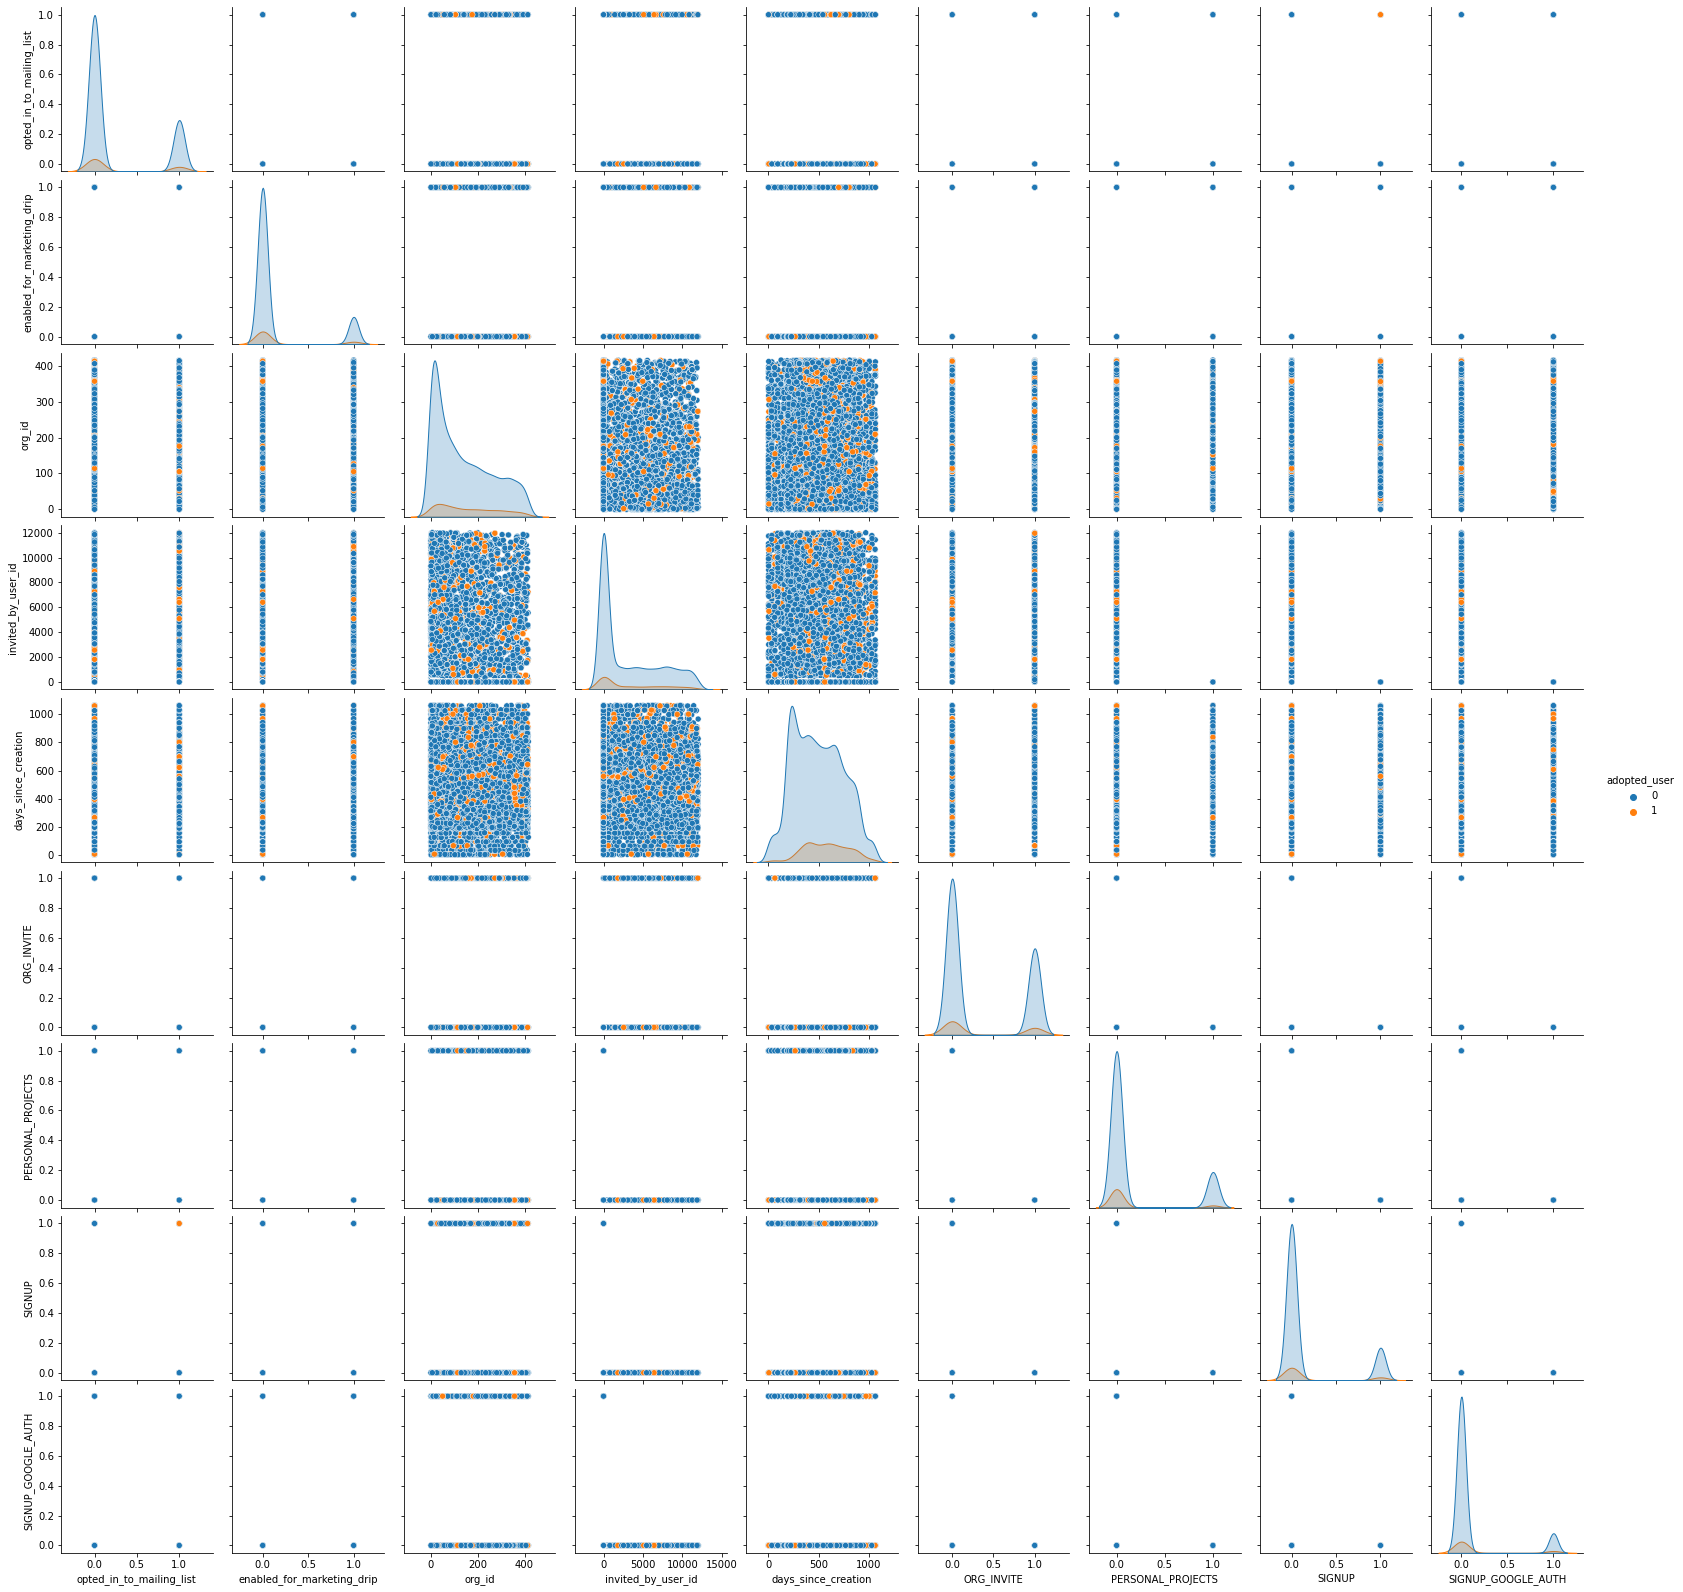

In [26]:
sns.pairplot(data,hue='adopted_user')

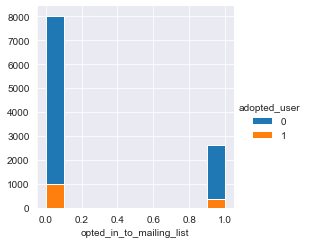

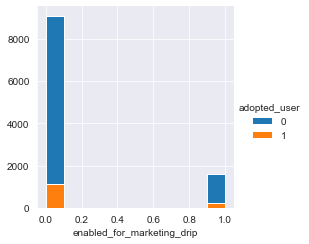

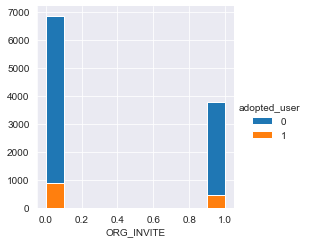

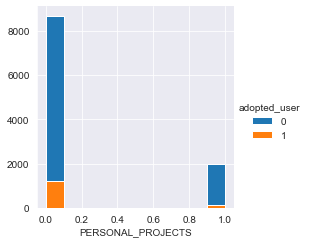

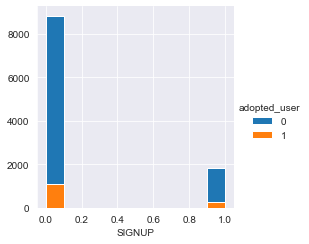

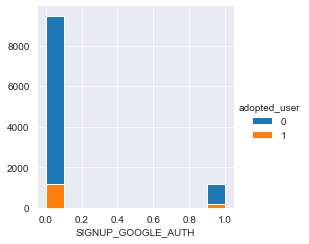

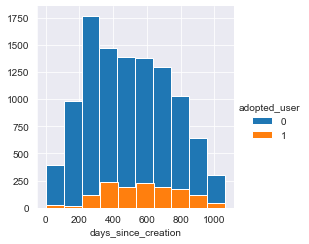

In [27]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH','days_since_creation',]:
    sns.set_style('darkgrid')
    g = sns.FacetGrid(data, hue = "adopted_user",height=3.5,aspect=1)
    g.map(plt.hist, col, alpha=1, bins =10)
    g.add_legend()   

adopted_user is imbalanced as only around 11% are adopted_user out of 12000 users

Let us apply random forest classifier model. Scaling not required as we are using random forest classifier

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from time import time

In [54]:
def optimise(model,params,X_train,Y_train):
    clf = GridSearchCV(model,param_grid=params,cv=10,scoring='accuracy')
    clf.fit(X_train,Y_train)
    return clf.best_estimator_

In [49]:
model_rf=RandomForestClassifier(class_weight='balanced')#to handle imbalanced data
params_rf={
    'n_estimators':[5,10,20,30,40,50,60,70,80,90,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,15,20],
    'max_features':['auto','log2']
}

In [50]:
X=data.drop('adopted_user',axis=1)
Y=data['adopted_user']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [53]:
model=optimise(model_rf,params_rf,X_train,Y_train)

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [34]:
model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', n_estimators=70)

In [35]:
model.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', n_estimators=70)

In [37]:
Y_pred=model.predict(X_test)

In [65]:
cm=confusion_matrix(Y_test,Y_pred)
print('confusion matrix is','\n',cm)
print('classification report is','\n',classification_report(Y_test,Y_pred))

confusion matrix is 
 [[2588   68]
 [ 337    7]]
classification report is 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2656
           1       0.09      0.02      0.03       344

    accuracy                           0.86      3000
   macro avg       0.49      0.50      0.48      3000
weighted avg       0.79      0.86      0.82      3000

